In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_rows', 50)
data = pd.read_csv("/Users/eduardogonzalez/Documents/examen-estadistica/suicide.csv")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [22]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [23]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [25]:
data.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'HDI_for_year',
       'gdp_for_year($)', 'gdp_per_capita($)', 'generation']

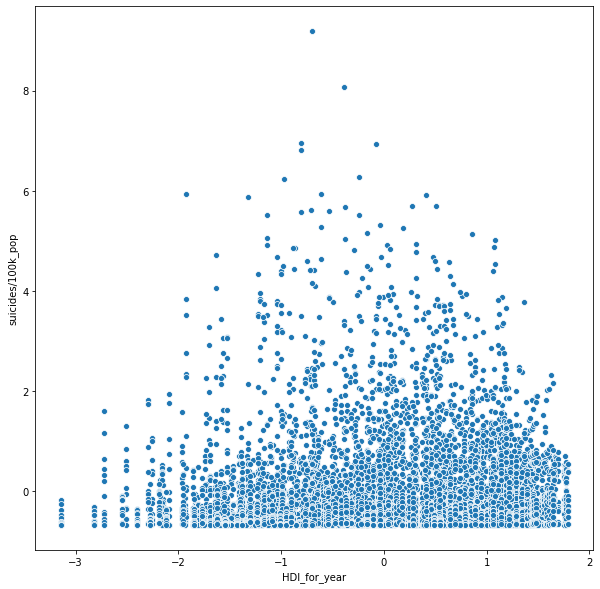

In [26]:
data_scaled = data.loc[:,['HDI_for_year','suicides/100k_pop']]
data_scaled = (data_scaled - data_scaled.mean()) / data_scaled.std()
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_scaled,x='HDI_for_year',y='suicides/100k_pop')

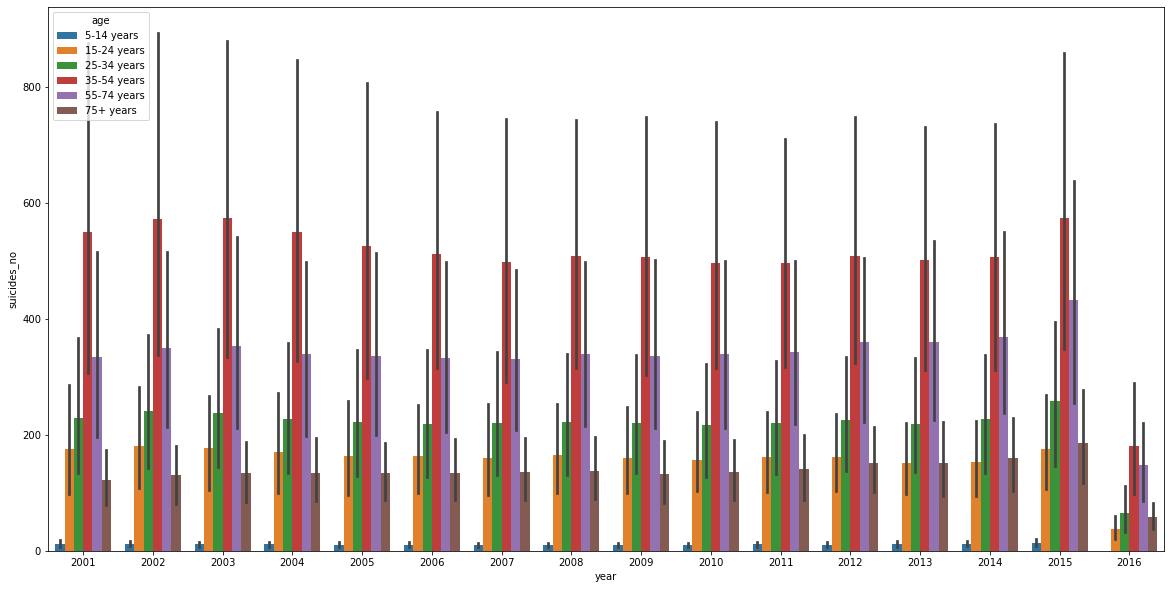

In [70]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[data['year']>2000],
            x='year',y='suicides_no',
            hue='age',
            hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

# Número de suicidios por cada 100,000 habitantes, por año

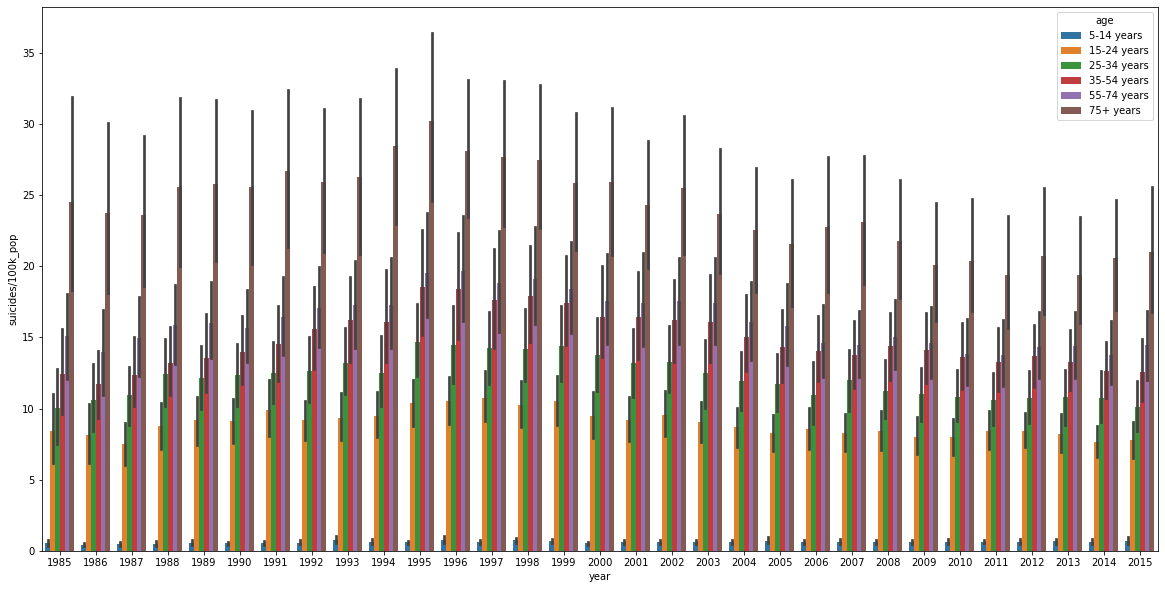

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[data['year']<2016],
            x='year',y='suicides/100k_pop',
            hue='age',
            hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

# Generación número de suicidios per 100k 

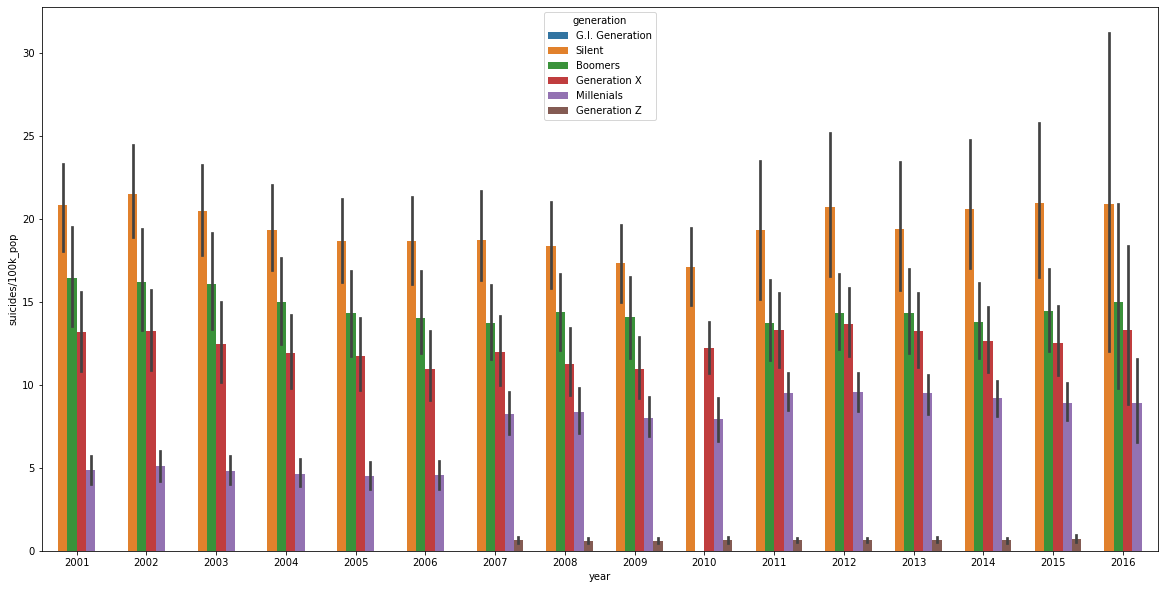

In [41]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[data['year']>2000],x='year',y='suicides/100k_pop',hue='generation',hue_order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])

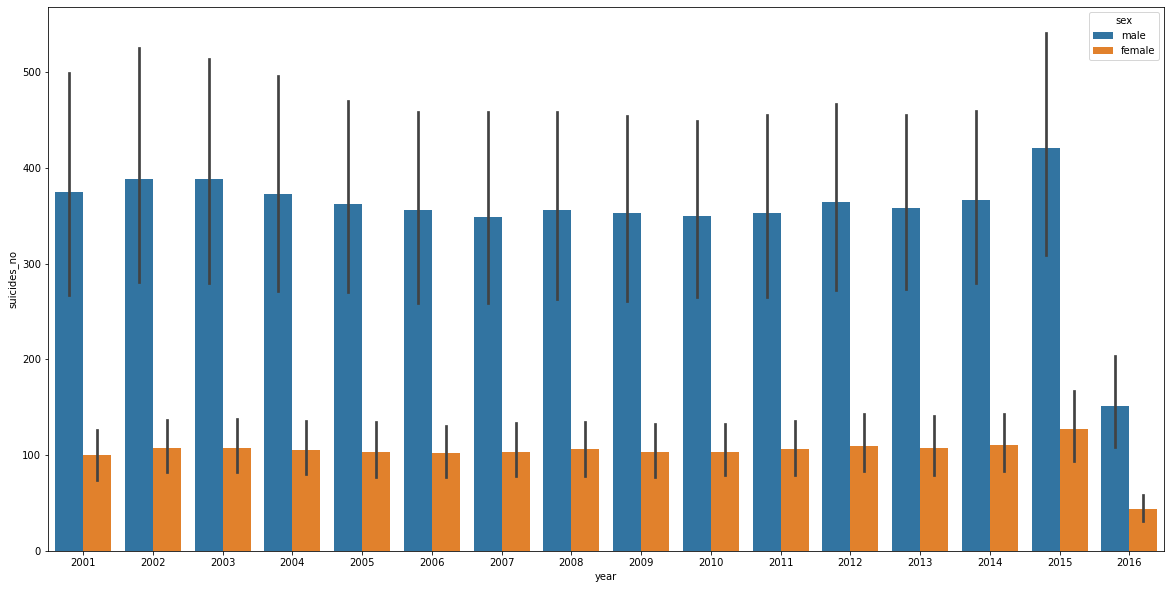

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[data['year'] > 2000],
            x='year',y='suicides_no',
            hue='sex')

# Numero de suicidios por genero y edades

In [61]:
datosgeneros=data.groupby(['age','sex'])['suicides_no'].sum().unstack()
datosgeneros=datosgeneros.reset_index().melt(id_vars='age')

In [62]:
datosgeneros_female=datosgeneros.iloc[:6,:]
datosgeneros_male=datosgeneros.iloc[6:,:]

In [63]:
datosgeneros_female

,age,sex,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984


In [64]:
datosgeneros_male

,age,sex,value
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267
10,55-74 years,male,1228407
11,75+ years,male,431134


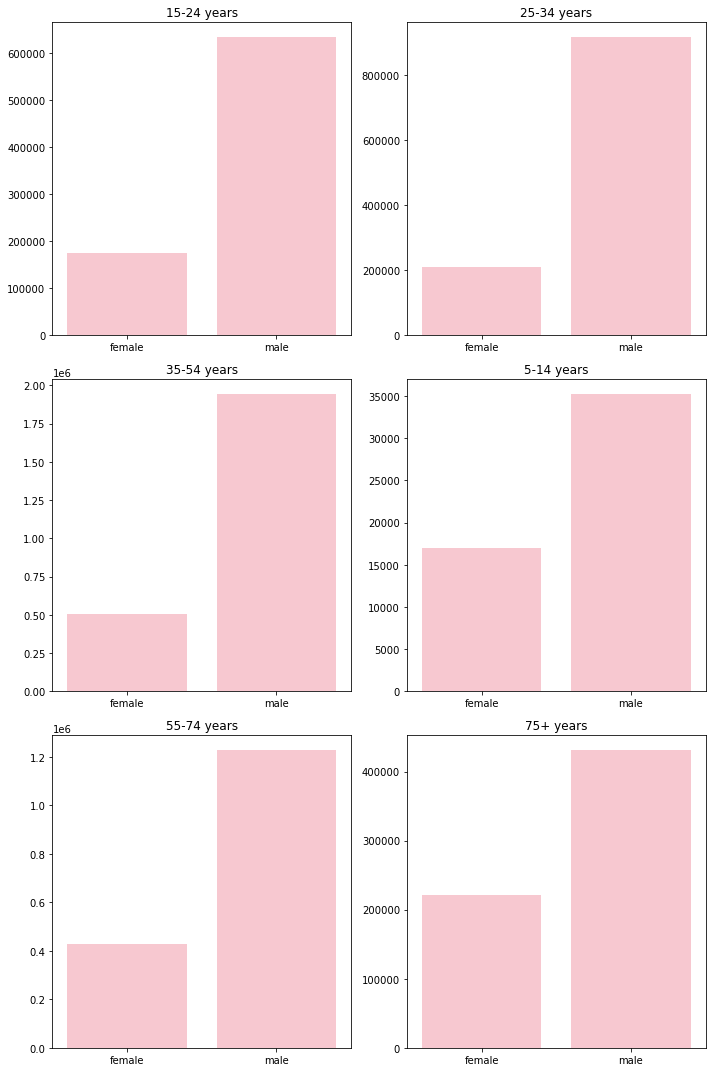

In [66]:
female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=['female','male'],y=[female_[i],male_[i]],color='pink')
    plt.tight_layout()
    fig.set_size_inches(10, 15)
plt.show()  

In [184]:
datosgeneros=data.groupby(['year','country'])['suicides_no'].sum().unstack()
#datosgeneros=datosgeneros.reset_index().melt(id_vars='age')

In [185]:
datosgeneros

country,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
year,,,,,,,,,,,,,,,,,,,,,
1985,NaN,0.0,1988.0,NaN,NaN,1861.0,2091.0,NaN,1.0,11.0,...,2982.0,29.0,NaN,NaN,NaN,NaN,5105.0,29446.0,287.0,NaN
1986,NaN,0.0,2284.0,NaN,NaN,2044.0,2139.0,NaN,NaN,NaN,...,2798.0,104.0,NaN,NaN,NaN,NaN,4839.0,30892.0,262.0,NaN
1987,73.0,0.0,2286.0,NaN,NaN,2164.0,2069.0,NaN,3.0,9.0,...,3035.0,119.0,NaN,272.0,10050.0,NaN,4594.0,30783.0,258.0,NaN
1988,63.0,0.0,2354.0,NaN,NaN,2172.0,1851.0,NaN,NaN,14.0,...,NaN,164.0,NaN,270.0,9751.0,NaN,4971.0,30388.0,268.0,NaN
1989,68.0,0.0,2247.0,NaN,NaN,2066.0,1898.0,NaN,NaN,NaN,...,NaN,173.0,NaN,253.0,10887.0,NaN,4361.0,30218.0,344.0,NaN
1990,NaN,1.0,2140.0,93.0,NaN,2202.0,1825.0,114.0,NaN,NaN,...,3753.0,170.0,NaN,298.0,10645.0,NaN,4643.0,30895.0,315.0,1459.0
1991,NaN,0.0,1951.0,80.0,NaN,2288.0,1769.0,134.0,NaN,NaN,...,3559.0,148.0,NaN,273.0,10700.0,NaN,4547.0,30790.0,NaN,1393.0
1992,47.0,0.0,2184.0,83.0,NaN,2251.0,1759.0,144.0,NaN,NaN,...,3550.0,163.0,NaN,271.0,11666.0,NaN,4628.0,30471.0,NaN,1344.0
1993,73.0,1.0,2230.0,106.0,NaN,2038.0,1704.0,119.0,7.0,NaN,...,NaN,174.0,NaN,240.0,12469.0,NaN,4462.0,31084.0,418.0,1355.0


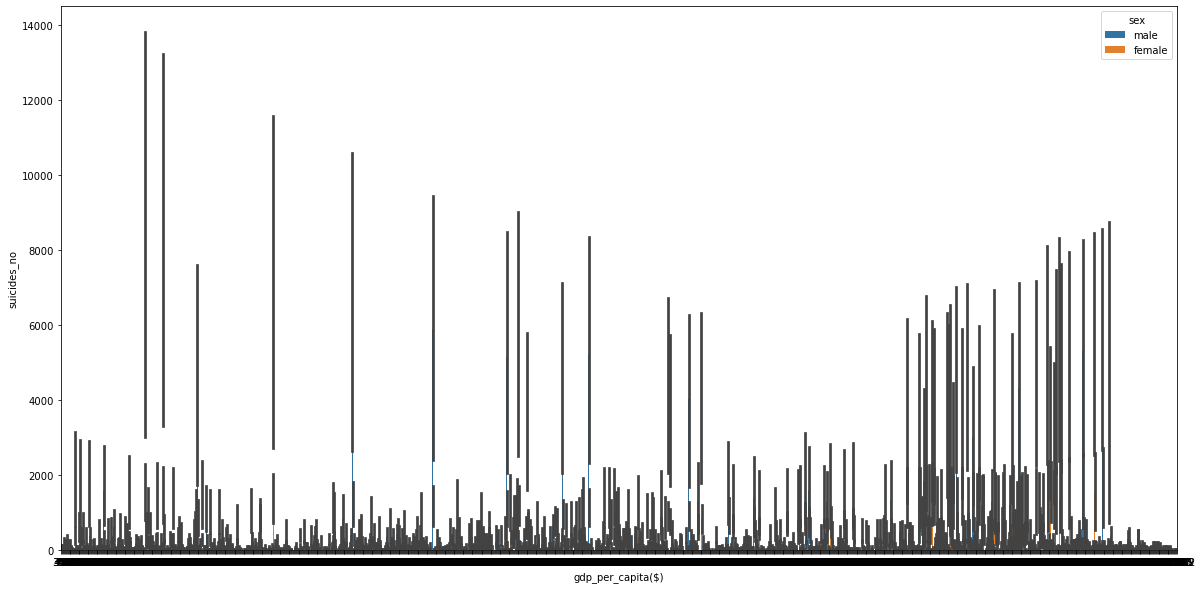

In [72]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[data['year'] > 2000],
            x='gdp_per_capita($)',y='suicides_no',
            hue='sex')

In [83]:
plt.figure(figsize=(20,10))
sns.barplot(data=data[(data['year'] > 2000),
            x='gdp_per_capita($)',y='suicides_no',
            hue='sex')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1440x720 with 0 Axes>

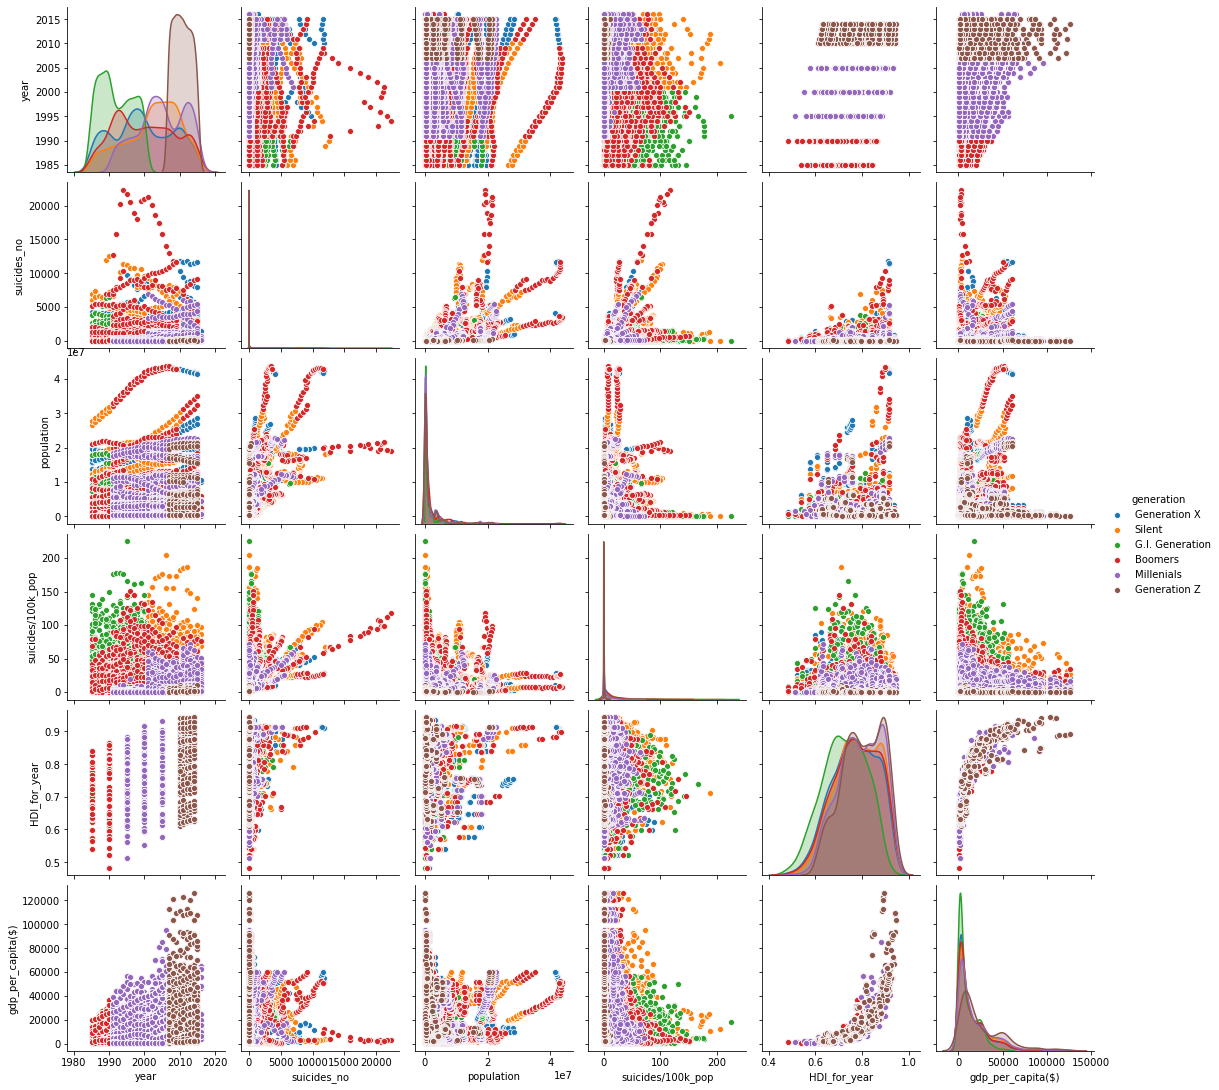

In [86]:
sns.pairplot(data,hue='generation')
plt.show()

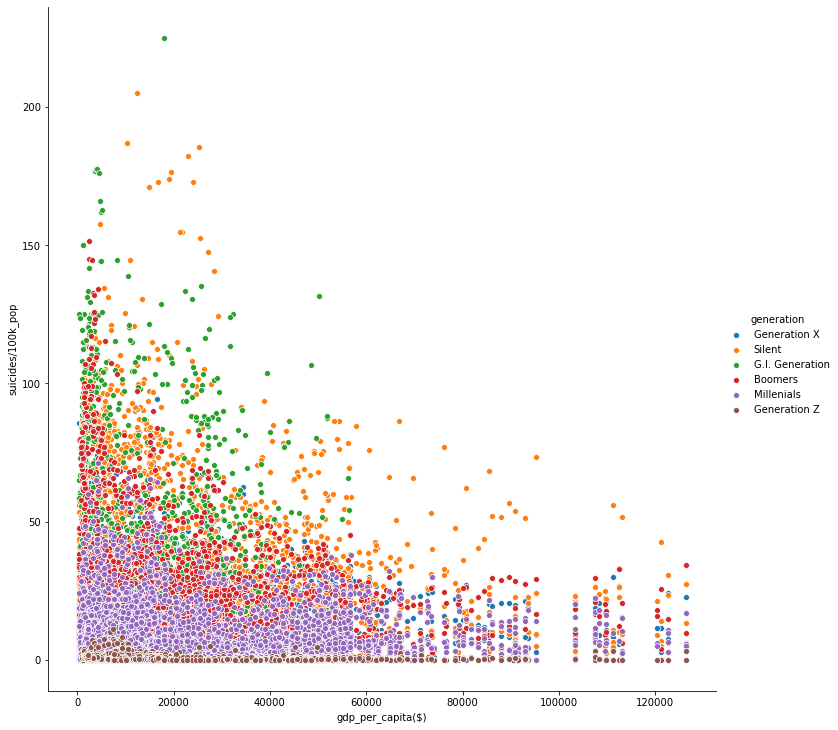

In [169]:
sns.pairplot(data,hue='generation',x_vars=['gdp_per_capita($)'],y_vars=['suicides/100k_pop'], height=10)
plt.show()

In [212]:
datospais=data.groupby(['age','country'])['suicides_no'].sum().unstack()
datospaiscienk=data.groupby(['age','country'])['suicides/100k_pop'].sum().unstack()

#datospais=datospais.reset_index().melt(id_vars='age')

In [213]:
datospaiscienk.head(285)

country,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
age,,,,,,,,,,,,,,,,,,,,,
15-24 years,198.58,0.00,548.56,62.41,113.78,783.34,807.17,41.57,57.36,71.48,...,417.90,723.67,34.28,604.17,784.45,19.25,367.90,703.45,680.90,376.46
25-34 years,188.12,15.00,482.95,108.82,366.43,1028.66,1027.35,52.05,83.02,196.75,...,541.03,1015.60,32.54,627.62,1398.59,22.02,608.04,878.69,845.14,436.28
35-54 years,160.21,63.41,528.95,163.40,270.93,982.41,1458.21,72.42,118.16,133.51,...,457.11,902.14,33.86,619.42,1933.55,19.26,675.29,994.52,976.27,484.06
5-14 years,19.09,0.00,42.32,9.42,0.00,23.68,31.26,7.00,6.97,5.31,...,20.20,51.88,4.56,45.98,65.16,0.63,6.58,45.47,39.26,47.45
55-74 years,136.17,100.73,820.51,247.45,297.85,809.60,1904.17,85.89,46.41,60.19,...,454.62,830.84,37.11,516.75,2081.43,24.27,527.21,988.47,1437.69,416.46
75+ years,222.59,0.00,1471.30,384.71,547.53,1049.72,3848.07,97.31,32.36,0.00,...,471.81,955.38,56.82,580.79,2668.48,9.46,605.90,1530.37,2559.70,377.46


In [214]:
datospaiscienk.Albania.sum()

924.76

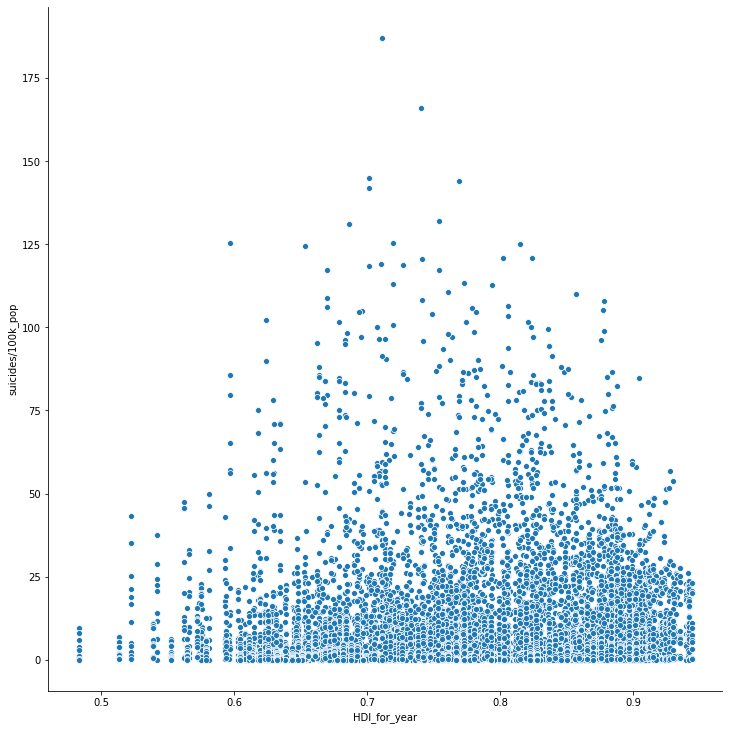

In [215]:
sns.pairplot(data,x_vars=['HDI_for_year'],y_vars=['suicides/100k_pop'], height=10)
plt.show()

In [216]:
#dataset por total de suicidios 
paises = {'Paises': ['Japon','México','Australia','Canada','Argentina','Singapore','France','Germany','Spain','Norway','Greece'],
        'totalsuicidios': [datospais.Japan.sum(),
                           datospais.Mexico.sum(),
                           datospais.Australia.sum(),
                           datospais.Canada.sum(),
                           datospais.Argentina.sum(),
                           datospais.Singapore.sum(),
                           datospais.France.sum(),
                           datospais.Germany.sum(),
                           datospais.Spain.sum(),
                           datospais.Norway.sum(),
                           datospais.Greece.sum(),
                          ]
          
        }


#Dataset con total de suicidos por 100 k
paisescienk = {'Paises': ['Japon','México','Australia','Canada','Argentina','Singapore','France','Germany','Spain','Norway','Greece'],
        'totalsuicidios100k': [datospaiscienk.Japan.sum(),
                           datospaiscienk.Mexico.sum(),
                           datospaiscienk.Australia.sum(),
                           datospaiscienk.Canada.sum(),
                           datospaiscienk.Argentina.sum(),
                           datospaiscienk.Singapore.sum(),
                           datospaiscienk.France.sum(),
                           datospaiscienk.Germany.sum(),
                           datospaiscienk.Spain.sum(),
                           datospaiscienk.Norway.sum(),
                           datospaiscienk.Greece.sum(),
                          ]
          
        }


In [217]:
paisesdf=pd.DataFrame(paises,columns=['Paises','totalsuicidios'])

paisesdfcien=pd.DataFrame(paisescienk,columns=['Paises','totalsuicidios100k'])

In [218]:
paisesdfcien

,Paises,totalsuicidios100k
0,Japon,8025.23
1,México,1751.19
2,Australia,4677.41
3,Canada,4338.72
4,Argentina,3894.59
5,Singapore,6340.98
6,France,7803.25
7,Germany,4854.69
8,Spain,3509.06
9,Norway,4658.76


# total suicidios por paises

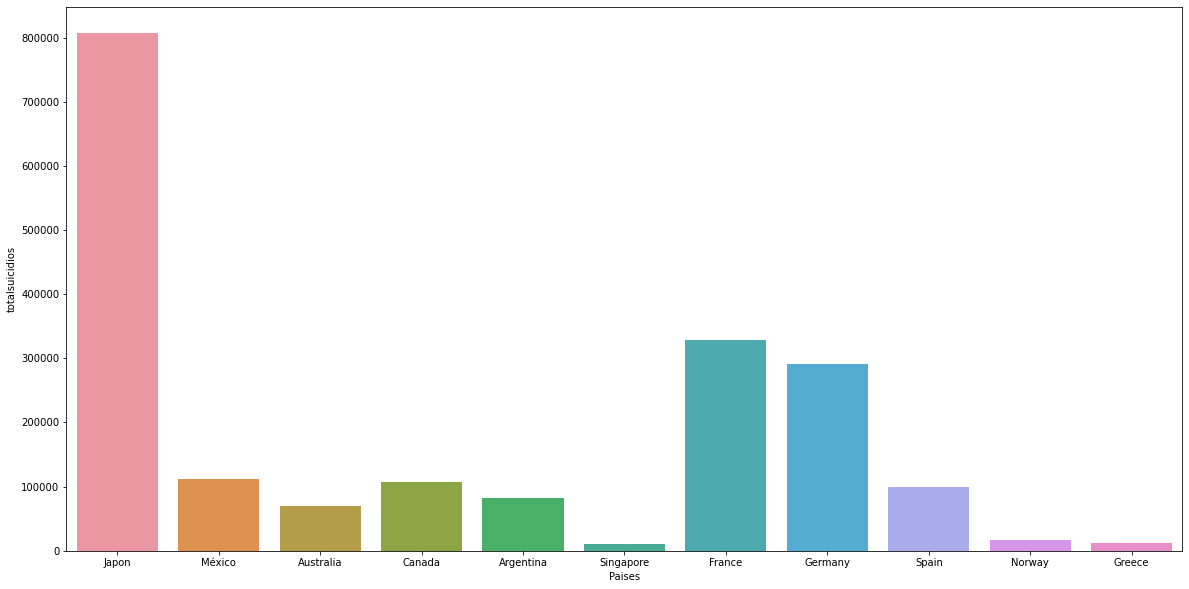

In [222]:
plt.figure(figsize=(20,10))
sns.barplot(x=paisesdf.Paises,y=paisesdf.totalsuicidios)

# total suicidios/100k por paises 


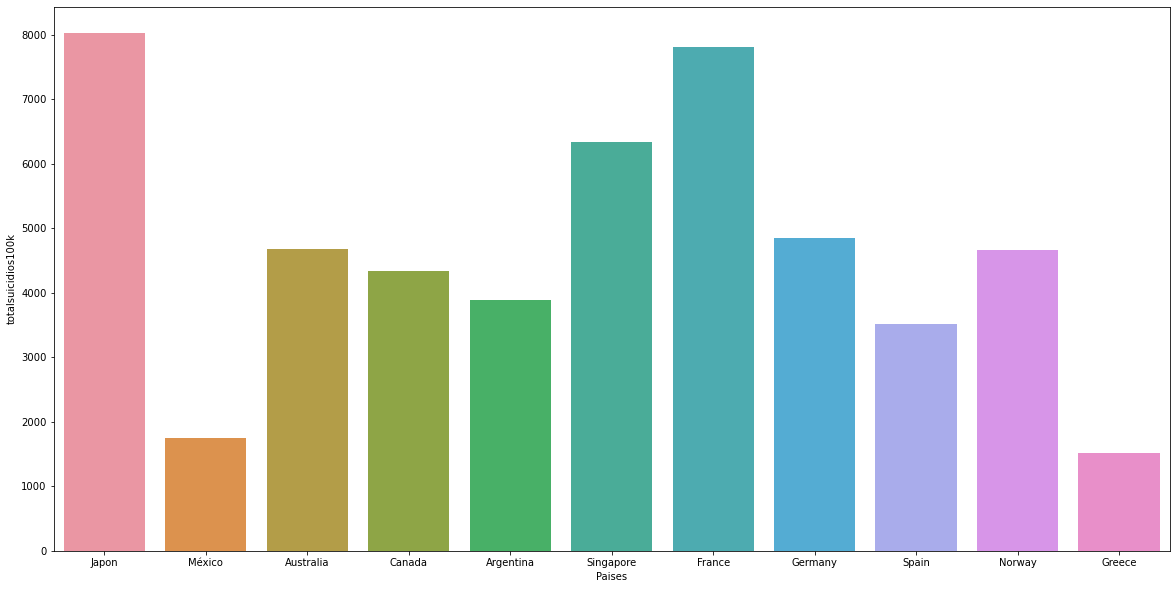

In [223]:
plt.figure(figsize=(20,10))
sns.barplot(x=paisesdfcien.Paises,y=paisesdfcien.totalsuicidios100k)